In [1]:
import numpy as np
#import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.integrate import simps

In [2]:
def error(T, sa):
    return np.sqrt((5.67e-8)**2 *((0.000127)**2 * T**8 + 16*T**6 * sa**2 * (0.02)**2))

In [3]:
def sqin_to_sqm(S):
    return S*0.00064516

def cuin_to_cumt(V):
    return V*1.6387e-5


In [4]:
def data_process(path, sa, V):
    df = pd.read_csv(path, names=["time", "ambient_temp", "object_temp"])
    df["object_temp_K"] = df["object_temp"] + 273.15
    df["Luminosity"] = (5.67e-8*0.24*(df['object_temp_K'])**4)*V
    #df["Luminosity"] = 5.67e-8*sa*0.24*(df['object_temp_K'])**4
    #df["Temperature"] = (df['object_temp_K'])
    df['time'] = pd.to_datetime(df['time'],format='%H:%M:%S.%f')
    df['time_only'] = df['time'].dt.time
    # Convert the time to a timedelta
    df['time_delta'] = pd.to_datetime(df['time_only'].astype(str), format='%H:%M:%S.%f') - pd.to_datetime('00:00:00',format='mixed')
    # Convert the timedelta to total seconds (including fractional seconds)
    df['time_in_seconds'] = df['time_delta'].dt.total_seconds()
    df['time_in_seconds_since_start'] = df["time_in_seconds"] - df.loc[0,'time_in_seconds']
    #data = df[["time_in_seconds_since_start", "Temperature"]].copy()
    data = df[["time_in_seconds_since_start", "Luminosity", "object_temp_K"]].copy()
    data["error"] = error(df["object_temp_K"], sa)
    data_truncated = data[data["time_in_seconds_since_start"]<=3300].copy()
    return data_truncated

In [5]:
import os

# Specify the directory
directory = 'Tests'  # replace with your actual directory

# Get the list of all files in the directory
file_list = os.listdir(directory)

sa0 = 37.178
sa20 = 52.936
sa40 = 56.984
sa60 = 71.614

v0= 5.1675
v20 = 13.5235
v40 = 14.8915
v60 = 17.4635

sam0 = sqin_to_sqm(sa0)
sam20 = sqin_to_sqm(sa20)
sam40 = sqin_to_sqm(sa40)
sam60 = sqin_to_sqm(sa60)

vm0 = cuin_to_cumt(v0)
vm20 = cuin_to_cumt(v20)
vm40 = cuin_to_cumt(v40)
vm60 = cuin_to_cumt(v60)

areas = [sam0, sam0, sam0, sam20, sam20, sam20, sam40, sam40, sam40, sam60, sam60, sam60]
volumes = [vm0, vm0, vm0, vm20, vm20, vm20, vm40, vm40, vm40, vm60, vm60, vm60]

# Print the list of files
print(file_list)


['0 degrees Trial 1.txt', '0 degrees Trial 2.txt', '0 degrees Trial 3.txt', '20 degrees Trial 1.txt', '20 degrees Trial 2.txt', '20 degrees Trial 3.txt', '40 degrees Trial 1.txt', '40 degrees Trial 2.txt', '40 degrees Trial 3.txt', '60 degrees Trial 1.txt', '60 Degrees Trial 2.txt', '60 degrees Trial 3.txt']


In [6]:
dataframes = []
for i,file in enumerate(file_list):
    print(i)
    path = "Tests\\" + file
    data = data_process(path, areas[i], volumes[i])
    dataframes.append(data)

0
1
2
3
4
5
6
7
8
9
10
11


In [7]:
colors  = ["black","black","black","red","red", "red","green", "green", "green", "blue", "blue", "blue"]
#labels = ["20", "20", "40", "40", "60", "60", "60"]


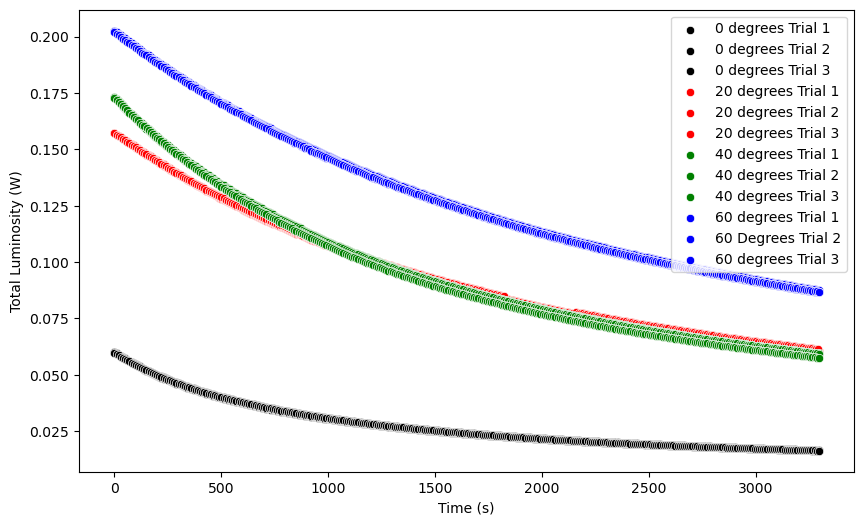

In [8]:
plt.figure(figsize=(10, 6))

file_list_short = []
for i in file_list:
    x = i[:-4]
    file_list_short.append(x)


for i, df in enumerate(dataframes):
    sns.scatterplot(x='time_in_seconds_since_start', y='Luminosity', data=df, color=colors[i], label = file_list_short[i])
plt.xlabel("Time (s)")
plt.ylabel("Total Luminosity (W)")
plt.show()


In [9]:
# plt.figure(figsize=(10, 6))
# for i, df in enumerate(dataframes):
#     sns.scatterplot(x='time_in_seconds_since_start', y='objecct_temp_K', data=df, color=colors[i], label = file_list[i])
# plt.show()

In [10]:
for i,df in enumerate(dataframes):
    area = simps(df["Luminosity"], df["time_in_seconds_since_start"])
    print(f"Angle = {file_list[i]}, Total Energy Released = {area}")

Angle = 0 degrees Trial 1.txt, Total Energy Released = 90.80619089918865
Angle = 0 degrees Trial 2.txt, Total Energy Released = 92.21411497638682
Angle = 0 degrees Trial 3.txt, Total Energy Released = 91.57068735843627
Angle = 20 degrees Trial 1.txt, Total Energy Released = 311.1513508537324
Angle = 20 degrees Trial 2.txt, Total Energy Released = 312.1563521259601
Angle = 20 degrees Trial 3.txt, Total Energy Released = 314.17009330450486
Angle = 40 degrees Trial 1.txt, Total Energy Released = 317.13186630428413
Angle = 40 degrees Trial 2.txt, Total Energy Released = 317.1650566105654
Angle = 40 degrees Trial 3.txt, Total Energy Released = 311.58854536001076
Angle = 60 degrees Trial 1.txt, Total Energy Released = 430.3448091869796
Angle = 60 Degrees Trial 2.txt, Total Energy Released = 427.05624196475725
Angle = 60 degrees Trial 3.txt, Total Energy Released = 426.99468380951396


In [11]:
df = dataframes[0]

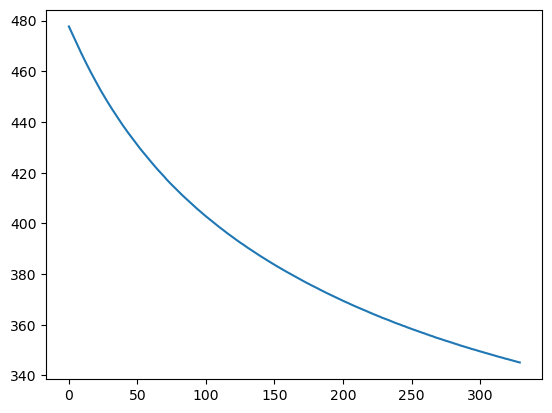

In [12]:
plt.plot(df["object_temp_K"])